**Loading and Exploring the IMDB Movie Reviews Dataset using TensorFlow Datasets**

In [3]:

import tensorflow_datasets as tfds

# Load the IMDB dataset
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# Split the dataset into training and testing sets
train_dataset, test_dataset = dataset['train'], dataset['test']

# Iterate through the dataset to see an example
for example, label in train_dataset.take(1):
    print('Text:', example.numpy())
    print('Label:', label.numpy())


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3XA0BZ/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3XA0BZ/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3XA0BZ/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Text: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Label: 0


**Preprocessing IMDb Movie Reviews for Sentiment Analysis Using TensorFlow**

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
# Load IMDb dataset from TensorFlow Datasets
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# Split the dataset into training and testing sets
train_dataset, test_dataset = dataset['train'], dataset['test']

# Extract text and labels from the dataset
train_texts, train_labels = zip(*[(text.numpy().decode('utf-8'), label.numpy()) for text, label in train_dataset])
test_texts, test_labels = zip(*[(text.numpy().decode('utf-8'), label.numpy()) for text, label in test_dataset])

# Data cleaning and preprocessing
def preprocess_text(text):
    # Tokenization and removing stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Apply cleaning and preprocessing
train_texts_preprocessed = [preprocess_text(text) for text in train_texts]
test_texts_preprocessed = [preprocess_text(text) for text in test_texts]

# Padding sequences to a fixed length
max_length = 100  # Choose a suitable maximum sequence length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts_preprocessed + test_texts_preprocessed)

train_sequences = tokenizer.texts_to_sequences(train_texts_preprocessed)
test_sequences = tokenizer.texts_to_sequences(test_texts_preprocessed)

train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Display the preprocessed data
print('Padded Sequences (Training):')
print(train_padded_sequences[:5])  # Displaying the first 5 padded sequences for training set

print('Padded Sequences (Testing):')
print(test_padded_sequences[:5])  # Displaying the first 5 padded sequences for testing set


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Padded Sequences (Training):
[[  288   258     2 10625  1233  3399   352  9322    18    57   102   204
    135   111   359     8    18    36    15  5379     2   506   621     2
    279  9644    76  2122   289   990    50 34951  6140   144  2841 19178
   2785 22678 21145  1308  4452  1314  3399    64   990   718  8620     2
   3529    56  1015   551    25     5  7833   172     5  1233  3399     6
    267    15   991   686     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  465   613  2180    30   469   533  1937    78   427    10  1226  2271
   3510 42508  3955    70    88  4390  1271  2180     3  1770    37   816
   1635  1119   474   233    78   326   452  1571  3358   802    95   886
     74     3   169  1982   151   326   452 32429    96    56  4669   124
    203  1924   247     3     0     0     0     0     0 

**Exploratory Data Analysis (EDA)**

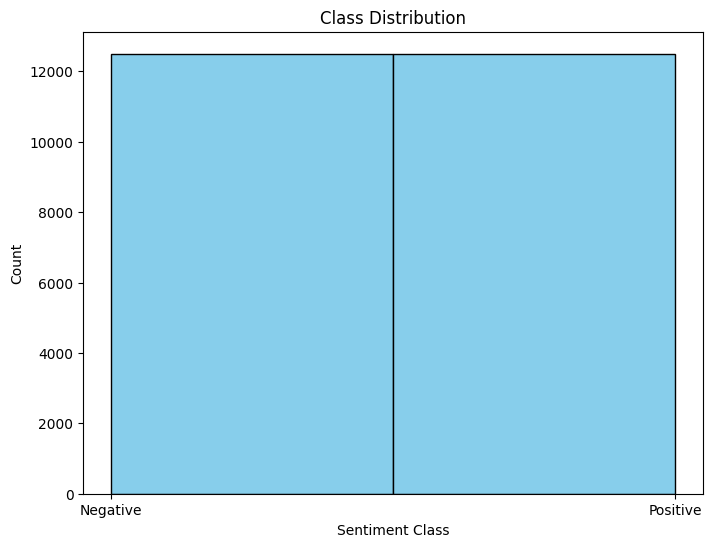

Class Distribution: {0: 12500, 1: 12500}


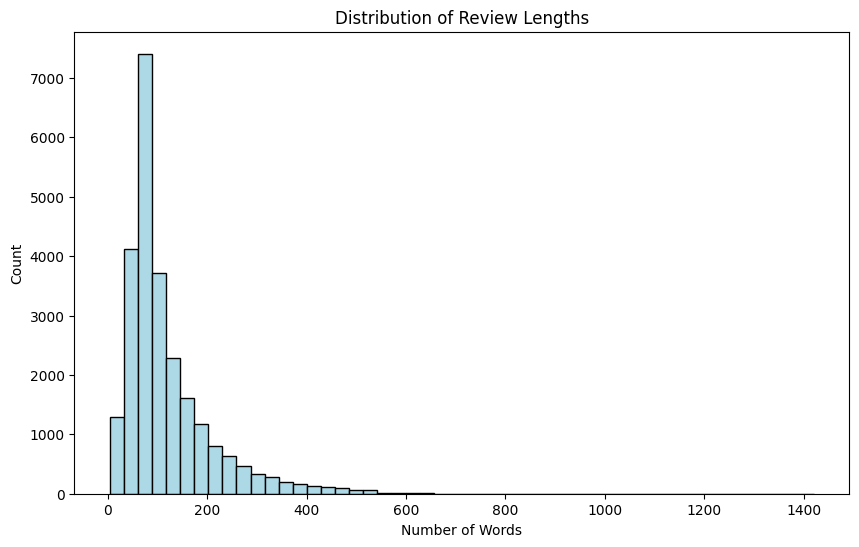

In [5]:
import matplotlib.pyplot as plt


# Visualize class distribution
def visualize_class_distribution(labels):
    plt.figure(figsize=(8, 6))
    plt.hist(labels, bins=2, color='skyblue', edgecolor='black')  # Use a single color for the histogram
    plt.title('Class Distribution')
    plt.xlabel('Sentiment Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.show()

# Check for class imbalance
def check_class_balance(labels):
    class_counts = {0: labels.count(0), 1: labels.count(1)}
    print('Class Distribution:', class_counts)

# Explore the length distribution of reviews
def explore_review_length_distribution(texts):
    review_lengths = [len(text.split()) for text in texts]
    plt.figure(figsize=(10, 6))
    plt.hist(review_lengths, bins=50, color='lightblue', edgecolor='black')
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Number of Words')
    plt.ylabel('Count')
    plt.show()

# Visualize class distribution
visualize_class_distribution(train_labels)

# Check for class imbalance
check_class_balance(train_labels)

# Explore the length distribution of reviews
explore_review_length_distribution(train_texts_preprocessed)


**Model Building**

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_padded_sequences, train_labels, test_size=0.2, random_state=42)

# Define the LSTM model with Batch Normalization
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)  # Initial learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks for Early Stopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
def lr_scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = LearningRateScheduler(lr_scheduler)

# Display the model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 128)          12400896  
                                                                 
 bidirectional_21 (Bidirect  (None, 100, 128)          98816     
 ional)                                                          
                                                                 
 batch_normalization_19 (Ba  (None, 100, 128)          512       
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 100, 128)          0         
                                                                 
 bidirectional_22 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                     

**Model Training**

Epoch 1/5
438/438 [==============================] - 15s 34ms/step - loss: 0.2236 - accuracy: 0.9201 - val_loss: 0.4129 - val_accuracy: 0.8540 - lr: 9.0484e-04
Epoch 2/5
438/438 [==============================] - 13s 30ms/step - loss: 0.1008 - accuracy: 0.9671 - val_loss: 0.4674 - val_accuracy: 0.8520 - lr: 9.0484e-04
Epoch 3/5
438/438 [==============================] - 13s 31ms/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.6275 - val_accuracy: 0.8510 - lr: 9.0484e-04
Epoch 4/5
438/438 [==============================] - 14s 32ms/step - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.6482 - val_accuracy: 0.8540 - lr: 8.1873e-04


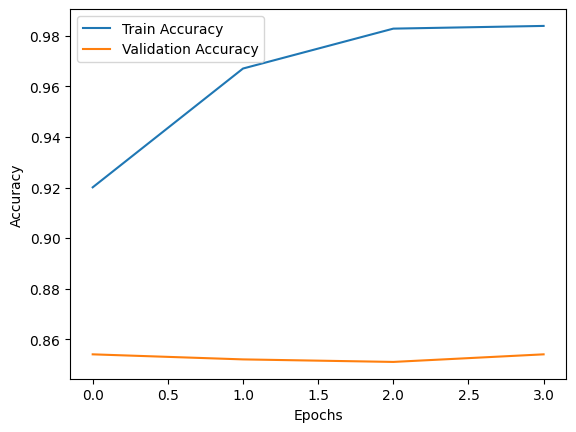

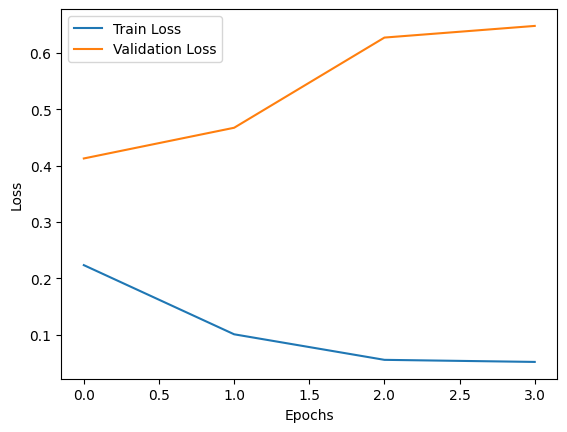

157/157 [==============================] - 2s 10ms/step - loss: 0.4149 - accuracy: 0.8522
Test Accuracy: 85.22%
Test Loss: 0.4149


In [35]:
# Train the model
import numpy as np

# Convert X_train and X_test to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.3, callbacks=[early_stopping, lr_schedule])



# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


**Model Evaluation**

157/157 [==============================] - 2s 9ms/step
Accuracy: 0.5152
Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      2576
           1       0.00      0.00      0.00      2424

    accuracy                           0.52      5000
   macro avg       0.26      0.50      0.34      5000
weighted avg       0.27      0.52      0.35      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


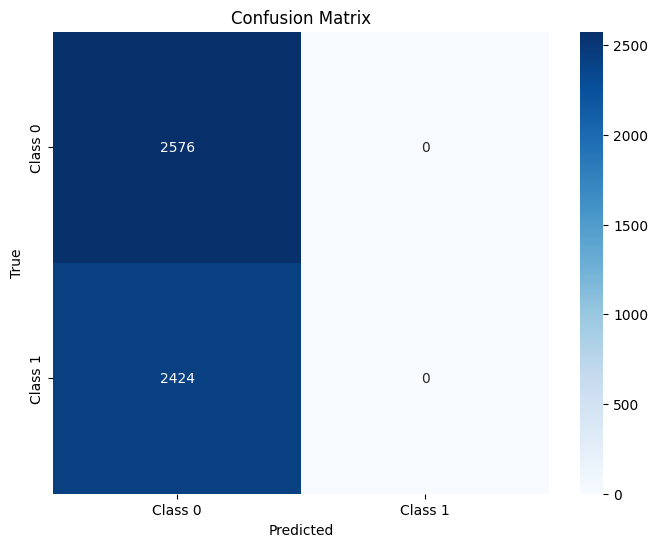

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns



y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels (0 or 1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
# Convert one-hot encoded true labels to class labels (if needed)
# Skip this step if y_test is already an array of class labels
y_true_labels = y_test


# Calculate accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
print('Classification Report:')
print(classification_report(y_true_labels, y_pred_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
